# cygnus-action-sampling

Analyze behavior of Cygnus when performing action sampling.


In [1]:
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

In [8]:
# Knobs
base_dir = '/u/cmolder/GitHub/ChampSim/out/cygnus/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'weighted'),
    ('google', 'weighted')
]
metrics  = [
    'ipc_improvement',
    #'L2C_pf_issued',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    {'PC'}, 
    {'PC_Delta'}, 
    {'Delta_Path'}, 
    {'Global'}
]
baselines = ['spp_dev2', 'bingo', 'spp_ppf_dev']
dpi = 192
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Pythia-Width': colormaps['Greys'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'Cygnus-Width': colormaps['Oranges'],
}

prefetcher_schemes = [
    "degree1/cygnus/bwaware3_ignorequeued_sampling",
    # "degreedyn/cygnus/bwaware3_ignorequeued_sampling",
    # "degreedyn/cygnus/bwaware3_width_moreactions_sampling",
]

sampling_schemes = [
    "1taken",
    "1random", "2random", "4random", "8random",
    "2randomtaken", "4randomtaken", "8randomtaken",
]

# Plots (suites)

In [9]:
dfs = {
    # ===
    # ===== Degree 1 =====
    # ===
    # Baselines
    'degree1/baseline': tables.load_stats_csv(
        base_dir, 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    # Pythia
    'degree1/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/bwaware3.csv', 
        features),

    # Cygnus
    # 'degree1/cygnus/bwaware3': tables.load_stats_csv_pythia(
    #     base_dir, 'degree1/cygnus/bwaware3.csv', 
    #     features, feature_key='features'),

    # Cygnus-Ignore
    'degree1/cygnus/bwaware3_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/cygnus/bwaware3_ignorequeued.csv', 
        features, feature_key='cygnus_features'),

    # Pythia-Ignore
    # 'degree1/cygnus/bwaware3_pythialike_ignorequeued': tables.load_stats_csv_pythia(
    #     base_dir, 'degree1/cygnus/bwaware3_pythialike_ignorequeued.csv', 
    #     features, feature_key='features'),

    # ===
    # ===== Dynamic degree =====
    # ===
    # Baselines
    'degreedyn/baseline': tables.load_stats_csv(
        base_dir, 'degreedyn/baseline.csv', baselines, prefetchers_level='l2'),

    # Pythia
    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', features),

    # Cygnus
    # 'degreedyn/cygnus/bwaware3': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3.csv',
    #     features, feature_key='features'),

    # Cygnus-Ignore
    'degreedyn/cygnus/bwaware3_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_ignorequeued.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width Ideal (-3.0 threshold)
    'degreedyn/cygnus/bwaware3_width_moreactions_ideal': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_threshold/-3.0prefetch.csv',
        features, feature_key='cygnus_features'),

    # Pythia-Ignore
    # 'degreedyn/cygnus/bwaware3_pythialike_ignorequeued': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3_pythialike_ignorequeued.csv',
    #     features, feature_key='features'),

    # Pythia-Width
    # 'degreedyn/cygnus/bwaware3_pythialike_width_moreactions': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3_pythialike_width_moreactions.csv',
    #     features, feature_key='features'), 
}

for pref in prefetcher_schemes:
    for samp in sampling_schemes:
        dfs[f'{pref}/{samp}'] = tables.load_stats_csv_pythia(
            base_dir, f'{pref}/{samp}.csv', features, feature_key='cygnus_features')

## 1-core, degree 1

In [10]:
feature = 'Delta_Path, PC_Delta'
degree1_1core_config = 'bwaware3'


degree1_1core_df = {
    #f'Pythia': dfs[f'degree1/pythia/{degree1_1core_config}'][feature],
    # f'Pythia-Ignore ': dfs[f'degree1/cygnus/{degree1_1core_config}_pythialike_ignorequeued'][feature],
    # f'Cygnus': dfs[f'degree1/cygnus/{degree1_1core_config}'][feature],

    f'Cygnus-Ignore 1 Taken': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/1taken'][feature],
    f'Cygnus-Ignore 1 Random': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/1random'][feature],
    f'Cygnus-Ignore 2 Random': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/2random'][feature],
    f'Cygnus-Ignore 4 Random': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/4random'][feature],
    f'Cygnus-Ignore 8 Random': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/8random'][feature],
    f'Cygnus-Ignore 2 RandomTaken': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/2randomtaken'][feature],
    f'Cygnus-Ignore 4 RandomTaken': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/4randomtaken'][feature],
    f'Cygnus-Ignore 8 RandomTaken': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued_sampling/8randomtaken'][feature],
    f'Cygnus-Ignore Ideal': dfs[f'degree1/cygnus/{degree1_1core_config}_ignorequeued'][feature],
}

degree1_1core_colors = {
    f'Pythia': cmaps['Pythia'](0.7),
    f'Pythia-Ignore': cmaps['Pythia-Ignore'](0.7),
    f'Cygnus': cmaps['Cygnus'](0.7),

    f'Cygnus-Ignore 1 Taken': cmaps['Cygnus-Ignore'](0.1),
    f'Cygnus-Ignore 1 Random': cmaps['Cygnus-Ignore'](0.2),
    f'Cygnus-Ignore 2 Random': cmaps['Cygnus-Ignore'](0.3),
    f'Cygnus-Ignore 4 Random': cmaps['Cygnus-Ignore'](0.4),
    f'Cygnus-Ignore 8 Random': cmaps['Cygnus-Ignore'](0.5),
    f'Cygnus-Ignore 2 RandomTaken': cmaps['Cygnus-Ignore'](0.6),
    f'Cygnus-Ignore 4 RandomTaken': cmaps['Cygnus-Ignore'](0.7),
    f'Cygnus-Ignore 8 RandomTaken': cmaps['Cygnus-Ignore'](0.8),
    f'Cygnus-Ignore Ideal': cmaps['Cygnus-Ignore'](0.9),
}

degree1_1core_legend_kwargs = {
    'ncol': 3,
    'fontsize': 6,
    'loc': 'lower left',
    'bbox_to_anchor': (0.0, 1.0),
}

degree1_1core_suptitle = '512 KB, degree 1, 1 core'

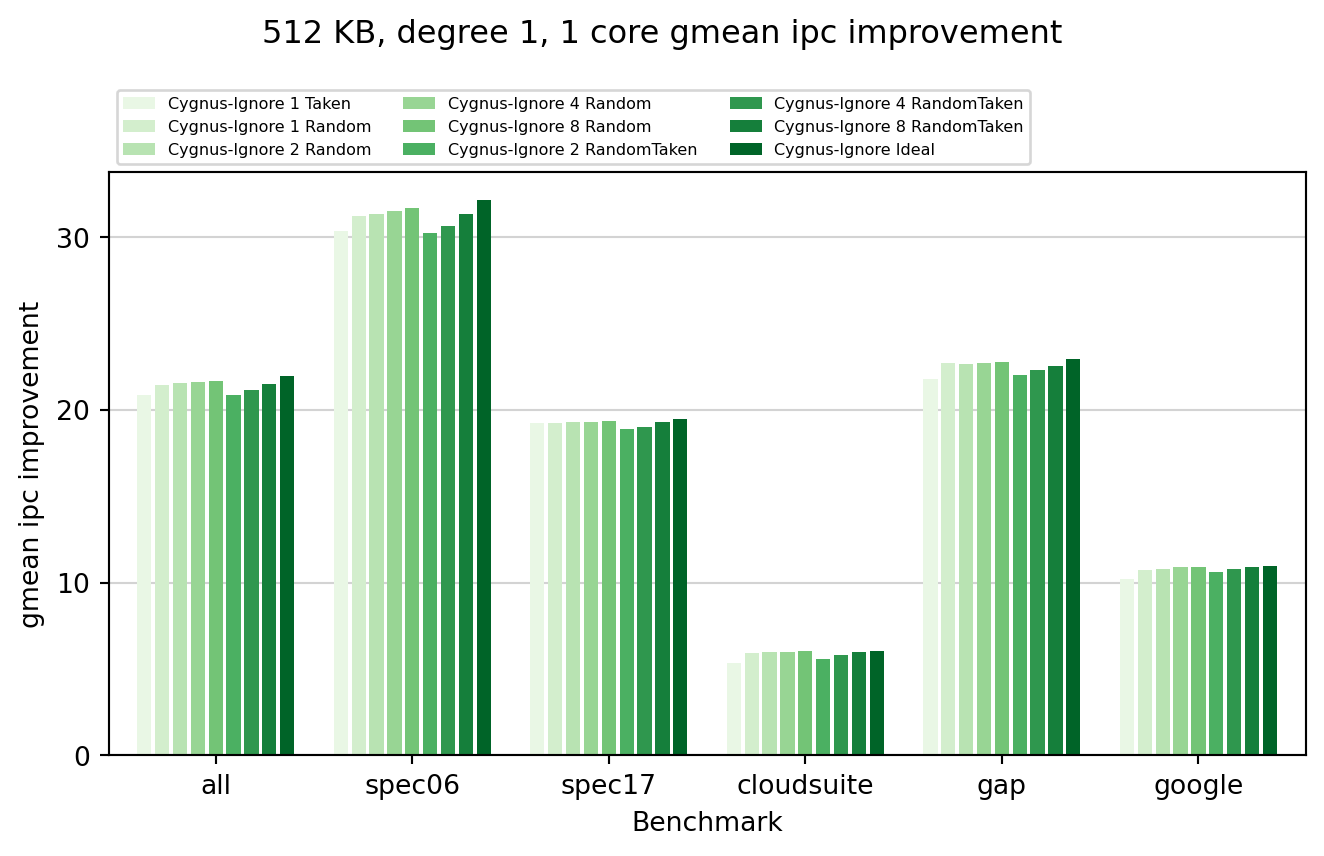

In [11]:
reload(plots)
plots.plot_metric_means(degree1_1core_df, suites=suites, metric='ipc_improvement', 
                        colors=degree1_1core_colors,
                        legend_kwargs=degree1_1core_legend_kwargs, 
                        dpi=192, figsize=(7, 4.5),
                        suptitle=degree1_1core_suptitle)

In [ ]:
plots.plot_everything(degree1_1core_df, suites=suites, metrics=metrics, 
                      colors=degree1_1core_colors,
                      legend_kwargs=degree1_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degree1_1core_suptitle)

In [ ]:
plots.plot_everything_accuracy(degree1_1core_df, suites=suites, level='L2C', 
                               colors=degree1_1core_colors,
                               legend_kwargs=degree1_1core_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degree1_1core_suptitle)

In [ ]:
plots.plot_everything_coverage(degree1_1core_df, suites=suites, level='L2C', 
                               colors=degree1_1core_colors,
                               legend_kwargs=degree1_1core_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degree1_1core_suptitle)

## 1-core, dynamic degree

In [7]:
feature = 'Delta_Path, PC_Delta'
degreedyn_1core_config = 'bwaware3'


degreedyn_1core_df = {
    #f'Pythia': dfs[f'degreedyn/pythia/{degreedyn_1core_config}'][feature],
    #f'Pythia-Ignore': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_pythialike_ignorequeued'][feature],
    # f'Pythia-Width': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_pythialike_width_moreactions'][feature],
    #f'Cygnus': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}'][feature],
    
    #f'Cygnus-Depth 1 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/1random'][feature],
    #f'Cygnus-Depth 2 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/2random'][feature],
    #f'Cygnus-Depth 4 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/4random'][feature],
    #f'Cygnus-Depth 8 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/8random'][feature],
    #f'Cygnus-Depth 2 RandomTaken': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/2randomtaken'][feature],
    #f'Cygnus-Depth 4 RandomTaken': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/4randomtaken'][feature],
    #f'Cygnus-Depth 8 RandomTaken': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued_sampling/8randomtaken'][feature],
    #f'Cygnus-Depth Ideal': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_ignorequeued'][feature],

    f'1 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/1random'][feature],
    f'2 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/2random'][feature],
    f'4 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/4random'][feature],
    #f'Cygnus 8 Random': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/8random'][feature],
    #f'1 Random + 1 Taken': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/2randomtaken'][feature],
    #f'3 Random + 1 Taken': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/4randomtaken'][feature],
    #f'Cygnus 8 RandomTaken': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_sampling/8randomtaken'][feature],
    f'Ideal': dfs[f'degreedyn/cygnus/{degreedyn_1core_config}_width_moreactions_ideal'][feature],

    #'SPP+PPF': dfs['degreedyn/baseline']['spp_ppf_dev'],
}

degreedyn_1core_colors = {
    f'Pythia': cmaps['Pythia'](0.7),
    f'Pythia-Ignore': cmaps['Pythia-Ignore'](0.7),
    f'Pythia-Width': cmaps['Pythia-Width'](0.7),
    f'Cygnus': cmaps['Cygnus'](0.7),
    
    f'Cygnus-Depth 1 Random': cmaps['Cygnus-Ignore'](0.4),
    f'Cygnus-Depth 2 Random': cmaps['Cygnus-Ignore'](0.525),
    f'Cygnus-Depth 4 Random': cmaps['Cygnus-Ignore'](0.65),
    f'Cygnus-Depth 8 Random': cmaps['Cygnus-Ignore'](0.775),
    f'Cygnus-Depth Ideal': cmaps['Cygnus-Ignore'](0.9),

    f'1 Random': cmaps['Cygnus-Width'](0.4),
    f'2 Random': cmaps['Cygnus-Width'](0.525),
    f'4 Random': cmaps['Cygnus-Width'](0.65),
    f'8 Random': cmaps['Cygnus-Width'](0.775),
    f'1 Random + 1 Taken': cmaps['Cygnus-Width'](0.525),
    f'3 Random + 1 Taken': cmaps['Cygnus-Width'](0.65),
    f'Ideal': cmaps['Cygnus-Width'](0.9),

    'SPP+PPF': 'darkturquoise'
}

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 8,
    'loc': 'lower center',
    'framealpha': 0,
    'bbox_to_anchor': (0.5, 1.0),
}

degreedyn_1core_suptitle = '512 KB, dynamic degree, 1 core'

In [14]:
# degreedyn_1core_df['1 Random'][['run_name', 'ipc_improvement']].run_name.to_numpy()

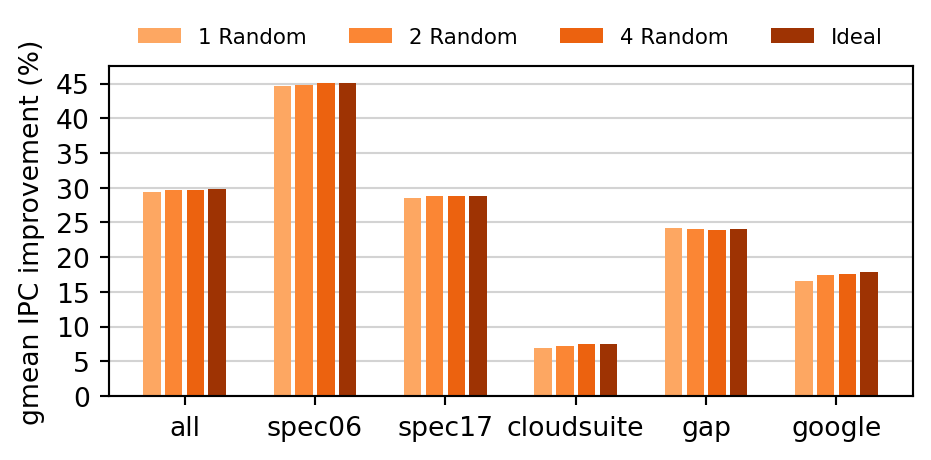

In [11]:
plots.plot_metric_means(degreedyn_1core_df, suites=suites, metric='ipc_improvement', 
                        colors=degreedyn_1core_colors,
                        legend_kwargs=degreedyn_1core_legend_kwargs, 
                        dpi=192, figsize=(5, 2.5),
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 47.5),
                        add_suptitle=False,
                        add_xlabel=False)
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/action_samples.pdf')

In [ ]:
from importlib import reload
reload(plots)
reload(tables)
plots.plot_everything(degreedyn_1core_df, suites=suites, metrics=metrics, 
                      colors=degreedyn_1core_colors,
                      legend_kwargs=degreedyn_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_suptitle)

In [ ]:
plots.plot_everything_accuracy(degreedyn_1core_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_colors,
                               legend_kwargs=degreedyn_1core_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_suptitle)

In [ ]:
plots.plot_everything_coverage(degreedyn_1core_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_colors,
                               legend_kwargs=degreedyn_1core_legend_kwargs, 
                               dpi=192, figsize=(12, 5.5),
                               suptitle=degreedyn_1core_suptitle)

# Tables

## 1-core, degree 1

In [ ]:
tables.table_everything(degree1_1core_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(degree1_1core_df, suites=suites, metric='ipc_improvement')

## 1-core, dynamic degree

In [ ]:
tables.table_everything(degreedyn_1core_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(degreedyn_1core_df, suites=suites, metric='ipc_improvement')